<a href="https://colab.research.google.com/github/MohammadMadadi94/Rahnema-ML/blob/main/Copy_of_final_project_rahnema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mohammad Madadi

# import parts

In [ ]:
import numpy as np
from tensorflow import keras
! pip install pandas_profiling==2.7.1
import matplotlib.pyplot as plt
import pandas as pd 
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 256kB 9.1MB/s 
     |████████████████████████████████| 3.2MB 14.4MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 1.1MB 39.8MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 296kB 51.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=26d46fdd3d12b40de69f7adb646b18197cd33889ea120da5c8b1b5d736d10268
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=e417de9a2c66181e55db18d7582f1fad1a266b7179133d45ccea4dc3ae819f1c
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

import dataset and description of the datas

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
#print(df)

In [ ]:
df.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


In [ ]:
data = pd.DataFrame(df)


In [ ]:
profile = ProfileReport(df)

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12215.000000,12225.000000,12196.000000,12204.000000,12196.000000,12191.000000,12216.000000,12208.000000,12222.000000,12201.000000,12214.000000,12218.000000,12204.000000,12179.000000
mean,2.315759,80.741179,0.502706,34.733067,31.814447,1192.220406,0.022231,0.043050,5.869171,0.061011,2.124857,2.358324,3.146673,4.069464
std,3.319969,176.660783,1.271342,141.364602,44.607472,1905.738105,0.048569,0.048543,18.545277,0.198111,0.912112,1.716343,2.401164,4.030383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.050000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.450000,0.003098,0.025183,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.750000,0.000000,0.000000,38.000000,1464.986003,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.shape


(12330, 18)

In [ ]:
profile.to_file('final_rahnema_profile.html')

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# `Missing values`

In [ ]:
df.isna().sum()

Administrative             115
Administrative_Duration    105
Informational              134
Informational_Duration     126
ProductRelated             134
ProductRelated_Duration    139
BounceRates                114
ExitRates                  122
PageValues                 108
SpecialDay                 129
Month                      118
OperatingSystems           116
Browser                    112
Region                     126
TrafficType                151
VisitorType                116
Weekend                    131
Revenue                      0
dtype: int64

In [ ]:
#the 'mean' of numerical features is used for missing data Imputation

df.Administrative.fillna(df.Administrative.mean(), inplace=True)
df.Administrative_Duration.fillna(df.Administrative_Duration.mean(), inplace=True)
df.Informational.fillna(df.Informational.mean(), inplace=True)
df.Informational_Duration.fillna(df.Informational_Duration.mean(), inplace=True)
df.ProductRelated.fillna(df.ProductRelated.mean(), inplace=True)
df.ProductRelated_Duration.fillna(df.ProductRelated_Duration.mean(), inplace=True)
df.BounceRates.fillna(df.BounceRates.mean(), inplace=True)
df.ExitRates.fillna(df.ExitRates.mean(), inplace=True)
df.PageValues.fillna(df.PageValues.mean(), inplace=True)
df.SpecialDay.fillna(df.SpecialDay.mean(), inplace=True)
df.SpecialDay.fillna(0.0, inplace=True)
df.Month.fillna('May', inplace=True)
#the 'most frequent data' of categorical features is used for missing data Imputation


df.OperatingSystems.value_counts()
df.OperatingSystems.fillna(2.0, inplace = True)

df.Browser.value_counts()
df.Browser.fillna(2.0, inplace = True)

df.Region.value_counts()
df.Region.fillna(1.0, inplace = True)

df.TrafficType.value_counts()
df.TrafficType.fillna(2.0, inplace = True)

df.VisitorType.value_counts()
df.VisitorType.fillna('Returning_Visitor', inplace = True)

df.Weekend.value_counts()
df.Weekend.fillna('False', inplace = True)

df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)
#df.Month.value_counts() 

In [ ]:
df.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [ ]:
#spliting data for train and test
df = df.sample(frac=1)
train , test =train_test_split(df , test_size =0.2)

In [ ]:
train.shape , test.shape

((9864, 27), (2466, 27))

In [ ]:
profile_train = ProfileReport(train)
profile.to_file('final_rahnema_profile_train.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

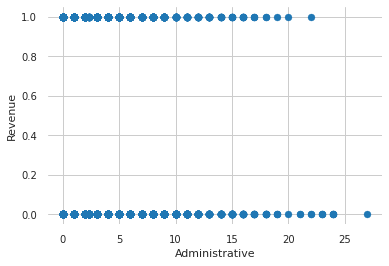

In [ ]:
plt.scatter(train.Administrative, train.Revenue)
plt.xlabel('Administrative'), plt.ylabel('Revenue')
plt.grid(True)

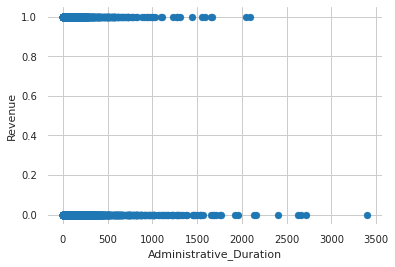

In [ ]:
plt.scatter(train.Administrative_Duration, train.Revenue)
plt.xlabel('Administrative_Duration'), plt.ylabel('Revenue')
plt.grid(True)


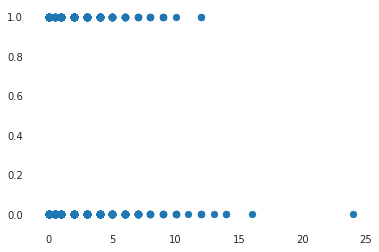

In [ ]:
plt.scatter(train.Informational, train.Revenue)



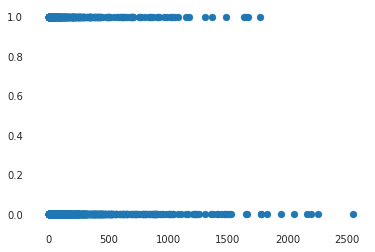

In [ ]:
plt.scatter(train.Informational_Duration, train.Revenue)


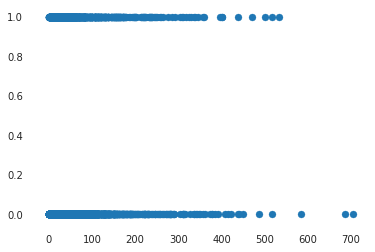

In [ ]:
plt.scatter(train.ProductRelated, train.Revenue)


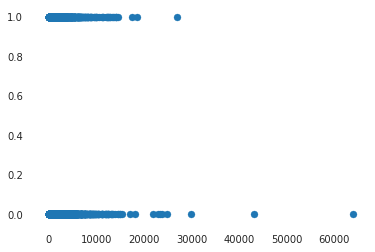

In [ ]:
plt.scatter(train.ProductRelated_Duration, train.Revenue)



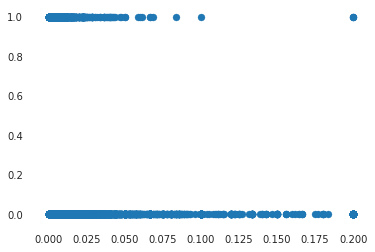

In [ ]:
plt.scatter(train.BounceRates, train.Revenue)


In [ ]:
train.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

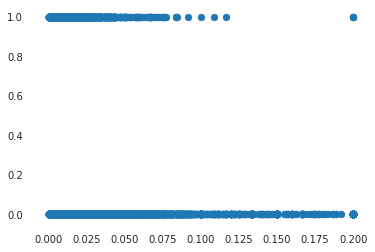

In [ ]:
plt.scatter(train.ExitRates, train.Revenue)


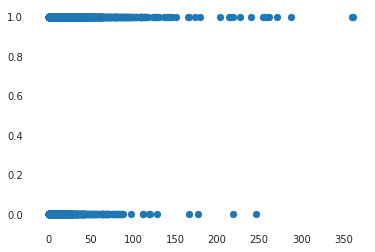

In [ ]:
plt.scatter(train.PageValues, train.Revenue)


# Training Model


***LogisticRegression Model  ***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver='liblinear', C=10.0, multi_class='ovr',random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
train_cols = ['PageValues', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates' , 'ExitRates', 'SpecialDay'] 
target_col = 'Revenue'


In [ ]:
cross_val_score(lr, df[train_cols], df[target_col], cv=5)

array([0.88037307, 0.88037307, 0.87429035, 0.88605028, 0.88199513])

FITTING TARIN DATA TO MODEL

In [ ]:
lr.fit(df[train_cols], df[target_col])

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

PREDICTING WITH TEST DATA

In [ ]:
probs = lr.predict_proba(test[train_cols])

In [ ]:
psur = probs[:,1]

In [ ]:
preds = lr.predict(test[train_cols])

MODEL SCORE

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score

In [ ]:
precision_score(test['Revenue'], preds), recall_score(test['Revenue'], preds)

(0.7232704402515723, 0.33236994219653176)

In [ ]:
roc_auc_score(test['Revenue'], psur)

0.8691589868033591

In [ ]:
fpr, tpr, thresholds = roc_curve(test['Revenue'], psur)

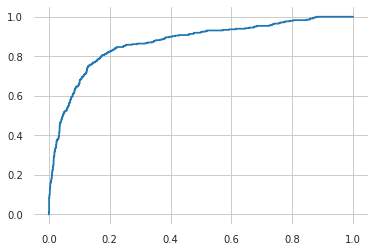

In [ ]:
plt.plot(fpr, tpr)
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test[target_col],preds))
print(classification_report(test[target_col],preds))

[[2076   44]
 [ 231  115]]
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2120
        True       0.72      0.33      0.46       346

    accuracy                           0.89      2466
   macro avg       0.81      0.66      0.70      2466
weighted avg       0.88      0.89      0.87      2466



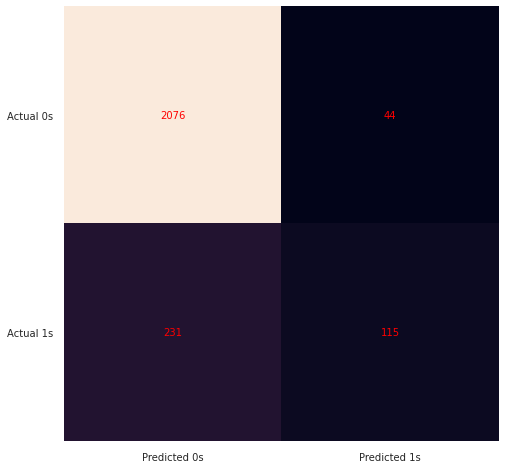

In [ ]:
cm = confusion_matrix(test[target_col],preds)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
#from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear')
#svclassifier.fit(train[train_cols], train[target_col])

In [ ]:
#y_pred = svclassifier.predict(test[train_cols])


In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(test['Revenue'],y_pred))
#print(classification_report(test['Revenue'],y_pred))